# Importing Libraries

In [70]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# importing geopy library and Nominatim class
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

# Importing folium for visualization
import folium
from folium import Marker
from folium import Icon
from folium import CircleMarker

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

#### Install additional Packages

In [ ]:
!pip install geopy
!pip install folium

In [72]:
plt.style.use('ggplot')

# Review the injection site and drop box locations

Begin exploration by reading the injection_site_locations.csv and needle_dropbox_locations.csv

The cvs's were derived from web scraping and HTML parsing from the "City of Toronto Web Parsing" notebook.

In [73]:
# Read the files into dataframes
needle_locations = pd.read_csv('needle_dropbox_locations.csv')
injection_locations = pd.read_csv('injection_site_locations.csv')

In [74]:
# Review the dataframe
needle_locations.head()

,Location Name,Address
0,The Works,277 Victoria St.
1,Casey House,119 Isabella St.
2,Dixon Hall,2714 Danforth Ave.
3,Eva's Satelite,25 Canterbury Place
4,Fred Victor,145 Queen St. E.


In [75]:
# Review the dataframe
injection_locations.head()

,Location Name,Address
0,Fred Victor,139 Jarvis St.
1,Moss Park CTS,134 Sherbourne St.
2,Parkdale Queen West Community Health Centre,168 Bathurst St.
3,Parkdale Queen West Community Health Centre,1229 Queen St. W.
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E.


We must add "Toronto" to the address so if the address appears in a different location, Nominatim can locate the Toronto address.

In [76]:
# Add the term "Toronto" to the address
needle_locations['Address'] = needle_locations['Address'] + " Toronto"
injection_locations['Address'] = injection_locations['Address'] + " Toronto"

In [77]:
# Call the geocoding service Nominatim
locator = Nominatim(user_agent="Geopy Library")

# Function to output the Latitude and Longitude
def address_to_coordinates(address):

    # Increase timeout due to slow running
    Location = locator.geocode(address, timeout=10)

    # Return a tuple containing (lat, long)
    return Location.latitude, Location.longitude

# Apply the functions to the "Address" columns in the dataframe and unzip the tuple to get the latitude and logitude in seperate columns
needle_locations['Latitude'], needle_locations['Longitude'] = zip(*needle_locations['Address'].apply(lambda x: address_to_coordinates(x)))
injection_locations['Latitude'], injection_locations['Longitude'] = zip(*injection_locations['Address'].apply(lambda x: address_to_coordinates(x)))


Lets review the new columns in the dataframes.

In [78]:
needle_locations.head()

,Location Name,Address,Latitude,Longitude
0,The Works,277 Victoria St. Toronto,43.656532,-79.379324
1,Casey House,119 Isabella St. Toronto,43.667948,-79.383837
2,Dixon Hall,2714 Danforth Ave. Toronto,43.689113,-79.298146
3,Eva's Satelite,25 Canterbury Place Toronto,43.772806,-79.414749
4,Fred Victor,145 Queen St. E. Toronto,43.653523,-79.372693


In [79]:
injection_locations.head()

,Location Name,Address,Latitude,Longitude
0,Fred Victor,139 Jarvis St. Toronto,43.653638,-79.373080
1,Moss Park CTS,134 Sherbourne St. Toronto,43.650110,-79.367883
2,Parkdale Queen West Community Health Centre,168 Bathurst St. Toronto,43.646596,-79.404186
3,Parkdale Queen West Community Health Centre,1229 Queen St. W. Toronto,43.641821,-79.429519
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E. Toronto,43.659435,-79.365355


Looks correct, lets plot it.

In [80]:
# Create a map of Toronto
map = folium.Map(location=[43.6426, -79.3871], 
                   tiles='cartodbpositron', 
                   zoom_start=11)
# Combine the Lat and Lon columns to become coordinates
injection_site_coord = list(zip(injection_locations['Latitude'], injection_locations['Longitude']))
needle_drop_coord = list(zip(needle_locations['Latitude'], needle_locations['Longitude']))

# Add points to the map
for lat, lon in injection_site_coord:
    CircleMarker([lat, lon], radius=3, color='red', fill=True, fill_color='red', fill_opacity=1).add_to(map)
for lat, lon in needle_drop_coord:
    CircleMarker([lat, lon], radius=3, color='blue', fill=True, fill_color='blue', fill_opacity=1).add_to(map)

map

# Review the Neighbourhoods geodata

Read the toronto_neighbourhoods.shp file from assignment 5 to explore the neighbourhoods.

We want to do EDA at the neighbourhood level, considering external factors to the property price.

In [81]:
# Read and view the shape file
neighbourhoods = gpd.read_file('toronto_neighbourhoods.shp')
neighbourhoods.head()

,FIELD_1,FIELD_2,FIELD_3,FIELD_4,FIELD_5,FIELD_6,FIELD_7,FIELD_8,FIELD_9,FIELD_10,FIELD_11,FIELD_12,FIELD_13,FIELD_14,FIELD_15,geometry
0,2101,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,2102,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,2103,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,2104,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,2105,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


We are only interested in the "geometry" column and "FIELD_8" column, which is the neighbourhood name.

In [82]:
# Extract the two columns from neighbourhoods
neighbourhoods = neighbourhoods[['FIELD_8', 'geometry']]

# Rename the column
neighbourhoods = neighbourhoods.rename(columns={'FIELD_8':'neighbourhood_name'})

# Split the entries in "neighbourhoood_name" and set the new entry to the first index
neighbourhoods['neighbourhood_name'] = neighbourhoods['neighbourhood_name'].apply(lambda word: word.split("(")[0])

# View GeoDataFrame
neighbourhoods.head()

,neighbourhood_name,geometry
0,Wychwood,"POLYGON ((-79.43592 43.68015, -79.43492 43.680..."
1,Yonge-Eglinton,"POLYGON ((-79.41096 43.70408, -79.40962 43.704..."
2,Yonge-St.Clair,"POLYGON ((-79.39119 43.68108, -79.39141 43.680..."
3,York University Heights,"POLYGON ((-79.50529 43.75987, -79.50488 43.759..."
4,Yorkdale-Glen Park,"POLYGON ((-79.43969 43.70561, -79.44011 43.705..."


Now that we have the neighbourhoods GeoDataFrame, we need to convert the needle_locations and injection_locations DataFrames into GeoDataFrames, so we can locate the sites within the neighbourhood polygons. This will create a new "geometry" column with POINT locations.

In [83]:
# Convert dataframes into a GeoDataFrames by specifying the latitude and longitude
needle_locations_gdf = gpd.GeoDataFrame(needle_locations, 
                                    geometry=gpd.points_from_xy(needle_locations['Longitude'], needle_locations['Latitude']),crs="EPSG:4326")

injection_locations_gdf = gpd.GeoDataFrame(injection_locations, 
                                       geometry=gpd.points_from_xy(injection_locations['Longitude'], injection_locations['Latitude']),crs="EPSG:4326")

# Ensure they use the epsg=26917 CRS 
neighbourhoods_26917=neighbourhoods.to_crs(epsg=26917)
needle_locations_gdf_26917 = needle_locations_gdf.to_crs(epsg=26917)
injection_locations_gdf_26917 = injection_locations_gdf.to_crs(epsg=26917)

In [84]:
# Review one GeoDataFrame for the new "geometry" column
injection_locations_gdf_26917.head()

,Location Name,Address,Latitude,Longitude,geometry
0,Fred Victor,139 Jarvis St. Toronto,43.653638,-79.373080,POINT (631194.130 4834690.297)
1,Moss Park CTS,134 Sherbourne St. Toronto,43.650110,-79.367883,POINT (631620.906 4834306.696)
2,Parkdale Queen West Community Health Centre,168 Bathurst St. Toronto,43.646596,-79.404186,POINT (628700.781 4833859.459)
3,Parkdale Queen West Community Health Centre,1229 Queen St. W. Toronto,43.641821,-79.429519,POINT (626667.695 4833290.175)
4,"Regent Park Bevel Up CTS Site, Regent Park Com...",465 Dundas St. E. Toronto,43.659435,-79.365355,POINT (631804.403 4835346.396)


Plot the location points in the neighbourhood file to see the trends.

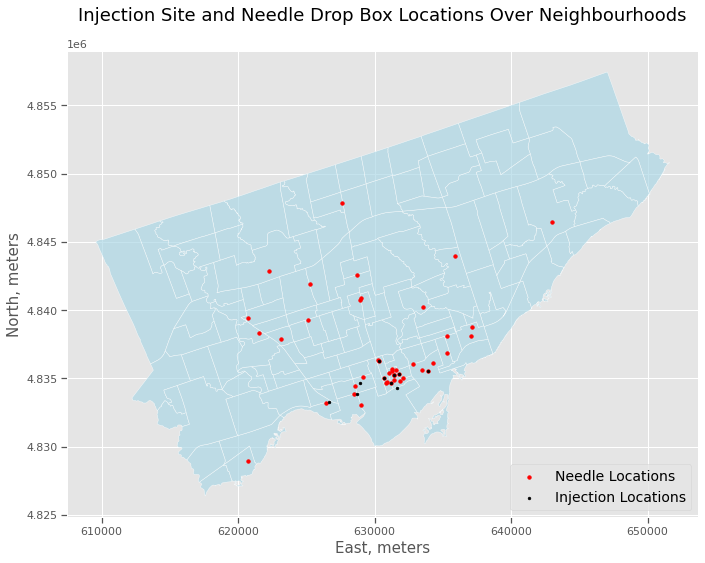

In [85]:
# Plot all three sets of data
ax= neighbourhoods_26917.plot(figsize=(12, 8), edgecolor='w', color='lightblue', alpha=0.7)
needle_locations_gdf_26917.plot(ax=ax, color='red', marker= 'o', label='Needle Locations', markersize=14)
injection_locations_gdf_26917.plot(ax=ax, color='black', marker= 'o', label='Injection Locations', markersize=8)

# Add a legend
plt.legend(fontsize = 14, loc=4)

# Set the axis labels
plt.xlabel('East, meters', fontsize=15)
plt.ylabel('North, meters', fontsize=15)
plt.title('Injection Site and Needle Drop Box Locations Over Neighbourhoods', fontsize=18, pad=30)
plt.savefig('plots/injection_site_drop_box_site_over_neighbourhood_map.png', dpi=300)
plt.show()

#### Trends:
It looks like the injection sites are mostly downtown and the drop boxes are mostly downtown, with some in other neighbourhooods. 

Calculate the area of each neighbourhood in square kilometers  so we can find the density of sites within each neighbourhood.

In [86]:
# Call the geometry.area method to get the area in m2 and divide by 10^6 to convert to km2
neighbourhoods_26917['area'] = round(neighbourhoods_26917.geometry.area / 10 ** 6,3)

# View the GeoDataFrame
neighbourhoods_26917.head()

,neighbourhood_name,geometry,area
0,Wychwood,"POLYGON ((626071.503 4837537.756, 626151.708 4...",1.682
1,Yonge-Eglinton,"POLYGON ((628032.302 4840233.689, 628139.346 4...",1.650
2,Yonge-St.Clair,"POLYGON ((629674.232 4837709.743, 629657.497 4...",1.161
3,York University Heights,"POLYGON ((620320.085 4846288.688, 620352.534 4...",13.247
4,Yorkdale-Glen Park,"POLYGON ((625714.291 4840359.316, 625680.263 4...",6.038


Calcualte the denisty of injection sites or drop boxes per square kilometre.

In [87]:
# Apply the .within() method to each row in the neighbourhoods geodataframe to determine which neighbourhood each site is in
neighbourhoods_26917['sites'] = neighbourhoods_26917.apply(lambda row: (needle_locations_gdf_26917.geometry.within(row.geometry).sum() + 
                                                            injection_locations_gdf_26917.geometry.within(row.geometry).sum()), axis=1)

# Sort the geodataframe by the stations
neighbourhoods_26917 = neighbourhoods_26917.sort_values(by='sites', ascending = False)

# Divide the number of stations in each neighbourhood by the area of each neighbourhood
neighbourhoods_26917['site_density'] = round(neighbourhoods_26917['sites'] / neighbourhoods_26917['area'],3)

# View the GeoDataFrame
neighbourhoods_26917.head()

,neighbourhood_name,geometry,area,sites,site_density
18,Moss Park,"POLYGON ((632910.604 4834938.350, 632883.548 4...",1.413,11,7.785
97,Church-Yonge Corridor,"POLYGON ((630881.766 4835659.785, 630893.584 4...",1.365,7,5.128
49,South Riverdale,"POLYGON ((634788.020 4834074.432, 634789.475 4...",10.965,4,0.365
39,Regent Park,"POLYGON ((632697.229 4835190.362, 632679.479 4...",0.650,3,4.615
136,Kensington-Chinatown,"POLYGON ((628713.653 4833925.535, 628698.164 4...",1.535,3,1.954


Visualize the resutls to see the variance in location density.

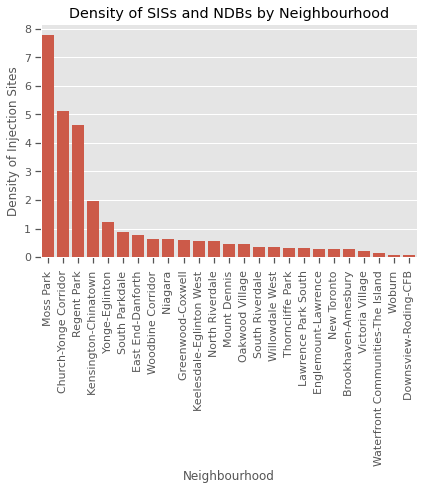

In [88]:
# Visualize only the neighbourhoods with injeciton or drop box sites
neighbourhoods_with_sites = neighbourhoods_26917[neighbourhoods_26917['sites']>0].sort_values(by='site_density',ascending = False)

# Plot a barplot
sns.barplot(neighbourhoods_with_sites, x='neighbourhood_name', y='site_density')

# Set titles and labels
plt.title('Density of SISs and NDBs by Neighbourhood')
plt.ylabel('Density of Injection Sites')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90)

# Save as png
plt.savefig('plots/Injection_site_density_by_neighbourhood.png', dpi=300)
plt.show()

Visualize the density with the Cloropleth map.

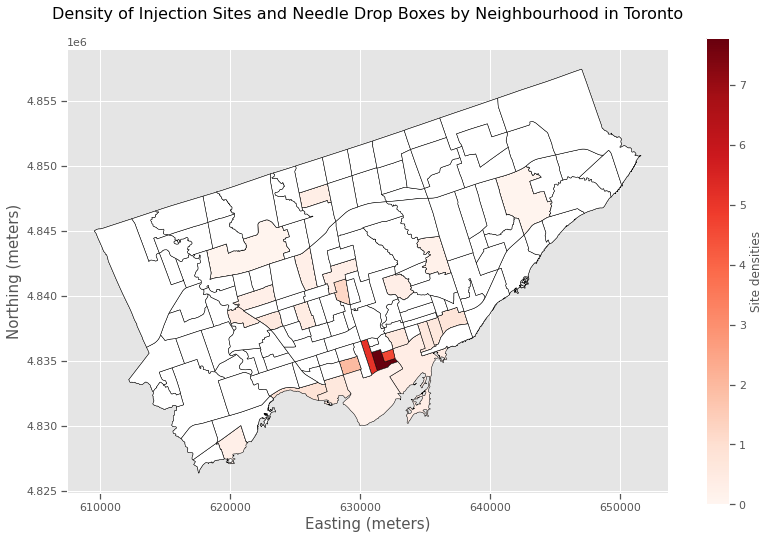

In [89]:
# Plot choropleth map for green space percentage
fig, ax = plt.subplots(figsize=(12, 8))
neighbourhoods_26917.plot(
    column="site_density",  # Use the green space percentage column
    cmap="Reds",  # Color scheme
    linewidth=0.5,  # Line width for ward boundaries
    edgecolor="black",  # Edge color for ward boundaries
    legend=True,  # Add legend
    legend_kwds={"label": "Site densities"},
    ax=ax,  # Axis to plot on
    vmin=0,
    vmax=neighbourhoods_26917['site_density'].max()
)

# Separate zero density areas
zero_area = neighbourhoods_26917['site_density'] == 0

# Overlay zero density areas in white. Set color to white for zero density
neighbourhoods_26917[zero_area].plot(
    color="white",
    linewidth=0.5,
    edgecolor="black",
    ax=ax
)
# Set figure title and labels
plt.title("Density of Injection Sites and Needle Drop Boxes by Neighbourhood in Toronto", fontsize=16, pad=30)
plt.xlabel("Easting (meters)", fontsize=15)
plt.ylabel("Northing (meters)", fontsize=15)

# Save as png
plt.savefig('plots/choropleth_map_site_density.png', dpi=300)

plt.show()

Save the new DataFrame as CSV for future use.

In [90]:
# Drop the 'geometry' column to turn it back into a DataFrame
neighbourhoods_26917_no_geom = neighbourhoods_26917.drop(columns='geometry')

# Save the DataFrame as a csv
neighbourhoods_26917_no_geom.to_csv('neighbourhood_injection_density.csv')

# Review the sold properties from Zillow

Read and review the csv and group the properties into neighbourhoods so an average neighbourhood price can be calculated.

In [91]:
# Read and view the zillow_coordinates.csv file into a dataframe
properties = pd.read_csv("zillow_coordinates.csv")
properties.head()

,address,price,link,bedrooms,bathrooms,cleaned_address,Latitude,Longitude
0,"2240 Lake Shore Blvd W #1701, Toronto, ON M8V 0B1","C$710,000",https://www.zillow.com/homedetails/2240-Lake-S...,--,--,"2240 Lake Shore Blvd W. , ON",43.621242,-79.483024
1,"11 Saint Joseph St N, Toronto, ON M4Y 3G4","C$532,000",https://www.zillow.com/homedetails/11-Saint-Jo...,--,--,"11 Saint Joseph St N., ON",29.943809,-90.069620
2,"899 Queen St E #409, Toronto, ON M4M 0C8","C$893,000",https://www.zillow.com/homedetails/899-Queen-S...,--,--,"899 Queen St E. , ON",43.660515,-79.341890
3,"49 E Liberty St #2508, Toronto, ON M6K 0A7","C$620,000",https://www.zillow.com/homedetails/49-E-Libert...,2,1,"49 E. Liberty St , ON",43.638846,-79.412554
4,"91 Drayton Ave, Toronto, ON M4C 3L8",$1.22M,https://www.zillow.com/homedetails/91-Drayton-...,--,--,"91 Drayton Ave, ON",43.681648,-79.318933


The only needed columns are 'price', 'Latitude', and 'Longitude'.

In [92]:
# Extract only the useful columns
properties = properties[['price', 'Latitude', 'Longitude']]
properties.head()

,price,Latitude,Longitude
0,"C$710,000",43.621242,-79.483024
1,"C$532,000",29.943809,-90.069620
2,"C$893,000",43.660515,-79.341890
3,"C$620,000",43.638846,-79.412554
4,$1.22M,43.681648,-79.318933


We must also convert the properties' latitudes and longitudes into GeoDataFrame point locations.

In [93]:
# Convert dataframe into a GeoDataFrame by specifying the latitude and longitude
properties_gdf_crs4326 = gpd.GeoDataFrame(properties, 
                                    geometry=gpd.points_from_xy(properties['Longitude'], properties['Latitude']),crs="EPSG:4326")

# Ensure they use the epsg=26917 CRS
properties_gdf_crs_26917=properties_gdf_crs4326.to_crs(epsg=26917)

In [94]:
# View teh GeoDataFrame for the new 'geometry' column
properties_gdf_crs_26917.head()

,price,Latitude,Longitude,geometry
0,"C$710,000",43.621242,-79.483024,POINT (622393.975 4830924.404)
1,"C$532,000",29.943809,-90.069620,POINT (-377081.485 3347393.464)
2,"C$893,000",43.660515,-79.341890,POINT (633694.013 4835503.876)
3,"C$620,000",43.638846,-79.412554,POINT (628042.348 4832985.800)
4,$1.22M,43.681648,-79.318933,POINT (635497.501 4837888.204)


Perform spatial analysis to determine which neighbourhood each sold property is in using the .sjoin() method.

In [95]:
# Use .sjoin to determine which neighbouhoods the properties are within
properties_gdf = gpd.sjoin(properties_gdf_crs_26917, neighbourhoods_26917[['geometry','neighbourhood_name']], how='left', op='within')

# Drop the "index_right" column
properties_gdf=properties_gdf.drop(columns=['index_right'])

In [96]:
# View the GeoDataFrame for the new neighbourhood names
properties_gdf.head()

,price,Latitude,Longitude,geometry,neighbourhood_name
0,"C$710,000",43.621242,-79.483024,POINT (622393.975 4830924.404),Mimico
1,"C$532,000",29.943809,-90.069620,POINT (-377081.485 3347393.464),NaN
2,"C$893,000",43.660515,-79.341890,POINT (633694.013 4835503.876),South Riverdale
3,"C$620,000",43.638846,-79.412554,POINT (628042.348 4832985.800),Niagara
4,$1.22M,43.681648,-79.318933,POINT (635497.501 4837888.204),Woodbine Corridor


In [97]:
# View the data types within each column and if there are any Nan values
properties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               318 non-null    object  
 1   Latitude            318 non-null    float64 
 2   Longitude           318 non-null    float64 
 3   geometry            318 non-null    geometry
 4   neighbourhood_name  307 non-null    object  
dtypes: float64(2), geometry(1), object(2)
memory usage: 14.9+ KB


The "price" column is currently an object type. To perform EDA with the average neighbourhood selling price, the "price" column must be converted to a numeric value. Clean the data by extracting characters such as "$", "C", ",".

In [98]:
# Create a function to clean the prices and return numeric values
def cleaned_price(price_row):
    # If the price is already a numeric value, return the value
    if isinstance(price_row, (int, float)):
        return price_row
    
    # If the price is a string, clean it
    if isinstance(price_row, str):
        # Remove 'C','$', and ','
        price_row = price_row.replace(',', '')
        price_row = price_row.replace('C', '')
        price_row = price_row.replace('$', '')
        price_row = price_row.strip()
        
        # Convert the M to millions and K to thousands
        # If it contains M, remove it, then turn it into a float and multiply the number by 1,000,000
        if 'M' in price_row:
            price_row = float(price_row.replace('M', '')) * 1000000
        # If it contains K, remove it, then turn it to a float and multiply the number by 1,000
        elif 'K' in price_row:
            price_row = float(price_row.replace('K', '')) * 1000
        # If it contains neither, directly convert it to a float if possible
        else:
            try:
                # Convert to an float if no 'M' or 'K'
                price_row = float(price_row)
            except ValueError:
                # If it cant be converted to an float, return nan
                price_row = float('nan')
    
    return price_row

# Apply the function to the 'price' column
properties_gdf['price'] = properties_gdf['price'].apply(cleaned_price)

In [99]:
# Vew the updated gdf
properties_gdf.head()

,price,Latitude,Longitude,geometry,neighbourhood_name
0,710000.0,43.621242,-79.483024,POINT (622393.975 4830924.404),Mimico
1,532000.0,29.943809,-90.069620,POINT (-377081.485 3347393.464),NaN
2,893000.0,43.660515,-79.341890,POINT (633694.013 4835503.876),South Riverdale
3,620000.0,43.638846,-79.412554,POINT (628042.348 4832985.800),Niagara
4,1220000.0,43.681648,-79.318933,POINT (635497.501 4837888.204),Woodbine Corridor


Review if any values returned Nan.

In [100]:
properties_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   price               310 non-null    float64 
 1   Latitude            318 non-null    float64 
 2   Longitude           318 non-null    float64 
 3   geometry            318 non-null    geometry
 4   neighbourhood_name  307 non-null    object  
dtypes: float64(3), geometry(1), object(1)
memory usage: 14.9+ KB


There are Nan values in "price" and "neighbourhood_name". Remove these rows for further processing.

In [101]:
# Drop Nan rows
properties_gdf=properties_gdf.dropna()

Now that we have a clean dataframe with prices and appropriate neighbourhood names, group the dataframe by the neighbourhood names and take the average of the sold prices for each neighbourhood.

In [102]:
# Group the proeprties by neighbourhood and calculate the average property price per neighbourhood
properties_in_neighbourhoods = properties_gdf.groupby(['neighbourhood_name'])[['price']].mean()
properties_in_neighbourhoods['price'] = round(properties_in_neighbourhoods['price'],0)

# View the grouping
properties_in_neighbourhoods

,price
neighbourhood_name,
Agincourt North,990000.0
Agincourt South-Malvern West,1298000.0
Alderwood,1560000.0
Annex,2108571.0
Banbury-Don Mills,1990000.0
...,...
Woodbine Corridor,1277500.0
Woodbine-Lumsden,1370000.0
Wychwood,1620000.0


Merge the properties and the injection site locations on the neighbourhood_name column so we have one dataframe with all information.

In [103]:
# Merge the dataframes
merged_df = pd.merge(properties_in_neighbourhoods, neighbourhoods_26917, on='neighbourhood_name').drop(columns='geometry')

# View the merged dataframe
merged_df.head()

,neighbourhood_name,price,area,sites,site_density
0,Agincourt North,990000.0,7.262,0,0.0
1,Agincourt South-Malvern West,1298000.0,7.873,0,0.0
2,Alderwood,1560000.0,4.978,0,0.0
3,Annex,2108571.0,2.790,0,0.0
4,Banbury-Don Mills,1990000.0,10.042,0,0.0


### Perform Correlation Analysis

Between the average neighbourhood price and te neighbourhood site density.

In [104]:
# Only consider neighbourhoods with positive site density
merged_df=merged_df[merged_df['site_density']>0]

# Determine the correlation between the variables
correlation = merged_df['price'].corr(merged_df['site_density'])
# View the correlation
correlation.round(2)

-0.16

#### Visualze the relationship with a scatter plot

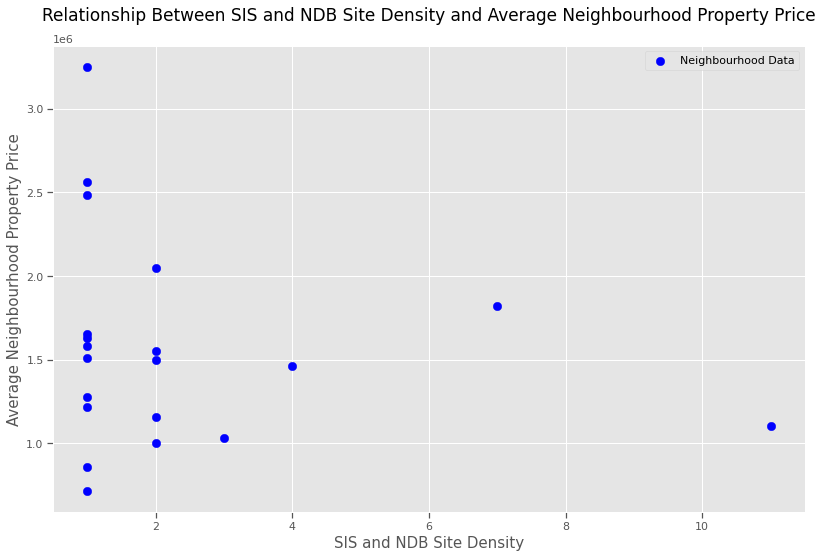

In [105]:
# Plot a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['sites'], merged_df['price'], label='Neighbourhood Data', s=70, color='blue')

# Label the axis and title
plt.xlabel('SIS and NDB Site Density', fontsize=15)
plt.ylabel('Average Neighbourhood Property Price', fontsize=15)
plt.title('Relationship Between SIS and NDB Site Density and Average Neighbourhood Property Price', pad=25, fontsize=17)
plt.legend()

# Save the plot as png
plt.savefig('plots/Price_vs_Site_Density_Scatterplot.png', dpi=300)
plt.show()